In [37]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

%matplotlib inline
warnings.filterwarnings('ignore')


# performing EDA

In [2]:
##### importing dataset.
data=pd.read_csv(r"C:\Users\Dell\Downloads\Titanic_Survival_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#  check shape
data.shape

(891, 12)

In [5]:
#####  checking categorial and numerical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# five point summary
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:

data.describe(include=object)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
#  checking for missing data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# getting all unique  records in age column
data["Age"].nunique()

88

In [11]:
# as there is as 77 % missing data in cabin column we are droping this column
data.drop("Cabin",axis=1,inplace=True)

In [12]:
data.shape

(891, 11)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# treat the missing value.
data["Age"]=data["Age"].fillna(data["Age"].mean())


In [16]:
data[["Age"]].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [18]:
# replace with mode
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode())

In [20]:
data[["Embarked"]].value_counts()

Embarked
S           644
C           168
Q            77
dtype: int64

In [ ]:
# repl
data["Embarked"]=data["Embarked"].fillna("S")

In [ ]:
data.isnull().sum()

In [ ]:
data.head()

Text(0.5, 1.0, ' number of passenger survived aut not')

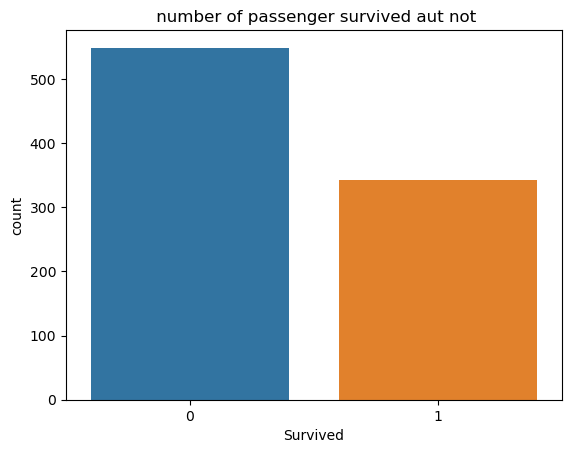

In [21]:
# check for balance and imbalaced dataset.

sns.countplot(data['Survived'])
plt.title(" number of passenger survived aut not")

In [23]:
data[["Survived"]].value_counts()

Survived
0           549
1           342
dtype: int64

In [30]:
#  for each age group of 20 distribution plot survived or not survived.
# green-survived(1)
# red=dead(not-survived=0) make by group chart

data["age_group"]=pd.cut(data["Age"],bins=[10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])



In [31]:
survival_by_age=data.groupby(['age_group'])['Survived'].mean().reset_index()

In [32]:
survival_by_age

,age_group,Survived
0,0-10,0.382609
1,10-20,0.334152
2,20-30,0.445161
3,30-40,0.383721
4,40-50,0.404762
5,50-60,0.235294
6,60-70,0.200000
7,70-80,NaN
8,80-90,NaN


<AxesSubplot:xlabel='age_group', ylabel='count'>

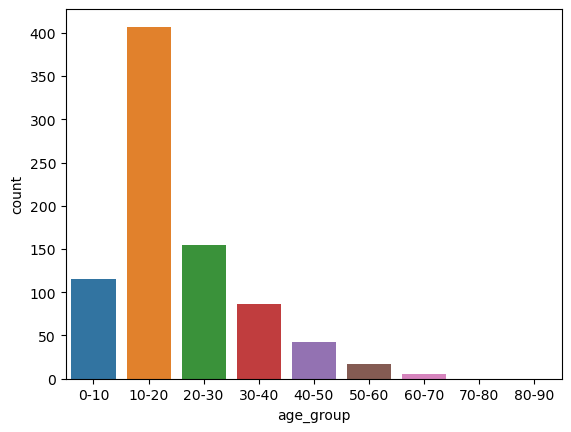

In [33]:
sns.countplot("age_group",data=data)

In [34]:
data.groupby("age_group")[["Survived"]].value_counts()

age_group  Survived
0-10       0            71
           1            44
10-20      0           271
           1           136
20-30      0            86
           1            69
30-40      0            53
           1            33
40-50      0            25
           1            17
50-60      0            13
           1             4
60-70      0             4
           1             1
70-80      0             0
           1             0
80-90      0             0
           1             0
dtype: int64

In [ ]:
# What is the overall survival rate of passengers on the Titanic?
# How does the survival rate differ by gender?
# How does the survival rate differ by age group?
# How does the survival rate differ by passenger class?
# What was the average fare paid by passengers? How does it differ by passenger class?
# How does the number of siblings/spouses aboard affect the survival rate?
# How does the number of parents/children aboard affect the survival rate?
# How does the port of embarkation affect the survival rate?
# Is there a correlation between passenger age and fare paid?
# Is there a +++++++ between passenger class and fare paid?

In [ ]:
# What is the overall survival rate of passengers on the Titanic?
data["Survived"].mean()

In [ ]:
data["Sex"].value_counts()

In [ ]:
# How does the survival rate differ by gender?
# sex_survived=data[["Sex","Survived"]].mean()
# sex_survived=data[["Sex","Survived"]].groupby("Sex",as_index=True).mean()\
survival_gender=data.groupby(["Sex"])["Survived"].sum()
survival_gender/len(data)


In [ ]:
# How does the survival rate differ by age group?
# age_Survived=data.groupby(["Age","Survived"]).count()
age_Survived=data.groupby(["Age"])[["Survived"]].sum()
age_Survived/len(data)

In [ ]:
age_Survived.head()

In [ ]:
# How does the survival rate differ by passenger class?
# passenger_Survived=data[["Pclass","Survived"]].groupby("Pclass").count()
passenger_Survived=data.groupby(["Pclass"])["Survived"].sum()
passenger_Survived/len(data)

In [ ]:
# What was the average fare paid by passengers? How does it differ by passenger class?
# fare_passenger=data[["Fare"]].count()
fare_passenger=data[["Fare"]].mean()

In [ ]:
fare_passenger.head()

In [ ]:
pclass=data[["Pclass","Fare"]].groupby("Pclass").mean()
# pclass=data[["Pclass","Fare"]].groupby("Pclass").count()
pclass/len(data)

In [ ]:
# data['age_group'] = pd.cut(data['Age'], bins=[0, 5, 10, 15, 20,25,30,35,40,45,50,55,60,65,70,75,80, 85])

In [ ]:
# How does the number of siblings/spouses aboard affect the survival rate?
sibling_survived=data.groupby(["SibSp"])[["Survived"]].sum()
sibling_survived/len(data)

In [ ]:
#  How does the number of parents/children aboard affect the survival rate?
parent_child=data.groupby(["Parch"])[["Survived"]].sum()
parent_child/len(data)


In [ ]:
parent_child

In [ ]:
# How does the part of embarkation affect the survival rate?
embark_survival=data.groupby(["Embarked"])[["Survived"]].sum()
embark_survival/len(data)

In [ ]:
#  Is there a correlation between passenger age and fare paid?
corr=data.corr()

In [ ]:
sns.heatmap(corr,annot=True)

In [ ]:
# Is there a correlation between passenger class and fare paid?
corr1=data[["Pclass","Fare"]].corr()
sns.heatmap(corr1)

In [ ]:
data.drop(["Name","Ticket"],axis=1)

In [ ]:
data=data.drop(["age_group"],axis=1)

In [ ]:
data.head()

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
onehot= OneHotEncoder()

In [38]:
cat_var=["Sex","Embarked"]

In [41]:
encoded_data=onehot.fit_transform(data[cat_var])

In [42]:
encoded_data

<891x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [49]:
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=onehot.get_feature_names(cat_var))

In [51]:
encoded_df.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0


In [52]:
titanic_encoded=pd.concat([data,encoded_df],axis=1)

In [54]:
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,10-20,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,20-30,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,10-20,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,20-30,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,20-30,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
titanic_encoded=titanic_encoded.drop(["Sex","Embarked","Sex_female","Embarked_S"],axis=1)

In [56]:
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,age_group,Sex_male,Embarked_C,Embarked_Q,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,10-20,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,20-30,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,10-20,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,20-30,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,20-30,1.0,0.0,0.0,0.0


In [60]:

titanic_encoded=titanic_encoded.reindex(columns=['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_C','Embarked_Q','Survived'])

In [61]:
titanic_encoded.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Survived
0,1,3,22.0,1,0,7.2500,1.0,0.0,0.0,0
1,2,1,38.0,1,0,71.2833,0.0,1.0,0.0,1
2,3,3,26.0,0,0,7.9250,0.0,0.0,0.0,1
3,4,1,35.0,1,0,53.1000,0.0,0.0,0.0,1
4,5,3,35.0,0,0,8.0500,1.0,0.0,0.0,0


In [62]:
# independent variable.
x=titanic_encoded.iloc[:,:-1]

In [63]:
# dependent varibale
y=titanic_encoded.iloc[:,-1]

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [66]:
x_train.shape

(712, 9)

In [67]:
x_test.shape

(179, 9)

In [68]:
y_train.shape

(712,)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
logistic=LogisticRegression()

In [71]:
logistic

LogisticRegression()

In [72]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [73]:
logistic.coef_

array([[ 6.40519603e-04, -6.74660847e-01, -9.16138670e-04,
        -1.34701214e-01, -1.12936486e-01,  4.65010329e-03,
        -2.65523939e+00,  6.80576085e-01,  1.32905781e-01]])

In [74]:
from sklearn.metrics import accuracy_score

In [77]:
# accuracy on train data
pre = logistic.predict(x_train)

In [78]:
acc = accuracy_score(pre, y_train)

In [79]:
acc

0.7893258426966292

In [81]:
# accuracy on test data
pre1 = logistic.predict(x_test)

In [85]:
acc1 = accuracy_score(pre1, y_test)

In [86]:
acc1

0.8268156424581006